<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Aufgabe 3.6 – Ballonfahrt

In der Datei <a href='messdaten_ballonfahrt.txt' download>messdaten_ballonfahrt.txt</a> finden Sie die Messdaten der Höhe eines Ballons während einer Ballonfahrt. In den ersten Zeilen der Datei sind Kommentarzeilen, die die Randbedingungen und den Aufbau der Messdatei beschreiben.

Gesucht ist ein Polynom, dass die Steiggeschwindigkeit, also die Änderung der Höhe mit der Zeit, des Heißluftballons beschreibt. Dies soll in zwei Unterschiedlichen Wegen implementiert werden.

## Aufgabenteil A

Schreiben Sie ein Programm, das die Höhe aus den Daten außließt, die Steiggeschwindigkeit berechnet und einen Fit der Geschwindigkeit mit einem Polynom dritten Grades durchführt. Plotten Sie die Höhe, die Geschwindigkeit und den Fit jeweils gegen die Zeit. Beschriften Sie die Achsen und erstellen Sie eine Legende.

### Lösungshinweis

Ihre Darstellung der Daten könnte folgendermaßen aussehen:

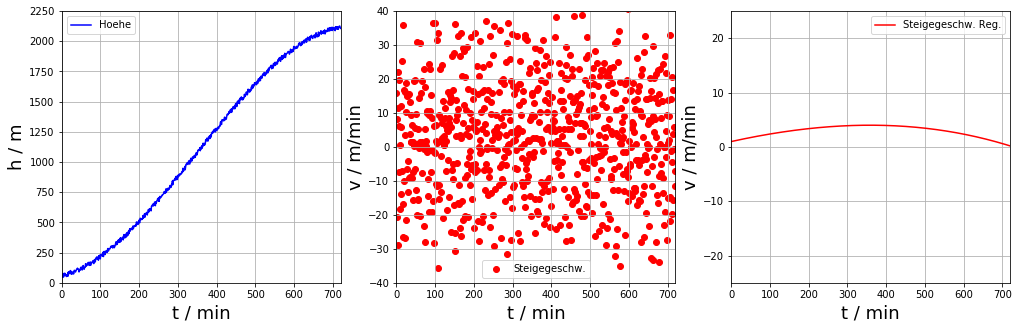

In [21]:
import numpy as np
import matplotlib.pyplot as plt

######################
### Aufgabenteil A ###
######################

# Laden und Umspeichern der Dateien
data = np.loadtxt('messdaten_ballonfahrt.txt', delimiter=';', skiprows=4)
t = data[:, 0]
h = data[:, 1]

# Array der Veraenderung der Hoehe
v = (h[1:]-h[:-1])/(t[1]-t[0])
t_v = t[:-1]

# Fit der Aenderung der Hoehe
v_P = np.polyfit(t_v, v, 3)
t_v_reg = np.linspace(np.min(t_v), np.max(t_v), 1000)
v_reg = np.polyval(v_P, t_v_reg)

# Plots
plt.figure(figsize=[17, 5])

plt.subplot(1, 3, 1)
plt.plot(t, h, 'b-', label='Hoehe')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([0, 2250])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('h / m', fontsize=18)

plt.subplot(1, 3, 2)
plt.scatter(t_v, v, c='r', label='Steigegeschw.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([-40, 40])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('v / m/min', fontsize=18)

plt.subplot(1, 3, 3)
plt.plot(t_v_reg, v_reg, 'r-', label='Steigegeschw. Reg.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([-25, 25])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('v / m/min', fontsize=18)
plt.show()

## Aufgabenteil B

Schreiben Sie ihr vorheriges Programm um, sodass nun zunächst eine Polynomregression dritten Grades der Höhendaten durchgeführt wird und leiten sie diese anschließend ab, um eine Funktion der Steiggeschwindigkeit zu erhalten. Plotten Sie wieder die Höhe, die Regression der Höhe sowie deren Ableitung und beschriften Sie die Plots.

### Lösungshinweis

Ihre Darstellung der Daten könnte folgendermaßen aussehen:

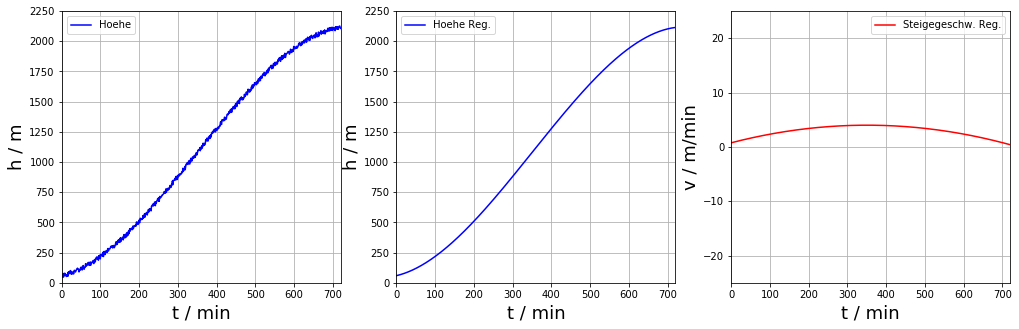

In [23]:
######################
### Aufgabenteil B ###
######################

# Erstellen und Auswerten des Polynomfits über die Hoehendaten
h_P = np.polyfit(t, h, 3)
t_reg = np.linspace(np.min(t), np.max(t), 1000)
h_reg = np.polyval(h_P, t_reg)

# Ableiten des Fits
dh_P = np.polyder(h_P)
dh_reg = np.polyval(dh_P, t_reg)

# Erstellung der Plots
plt.figure(figsize=[17,5])

plt.subplot(1, 3, 1)
plt.plot(t, h, 'b-', label='Hoehe')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([0, 2250])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('h / m', fontsize=18)

plt.subplot(1, 3, 2)
plt.plot(t_reg, h_reg, 'b-', label='Hoehe Reg.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([0, 2250])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('h / m', fontsize=18)

plt.subplot(1, 3, 3)
plt.plot(t_reg, dh_reg, 'r-', label='Steigegeschw. Reg.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([-25, 25])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('v / m/min', fontsize=18)
plt.show()

## Lösungsvorschlag

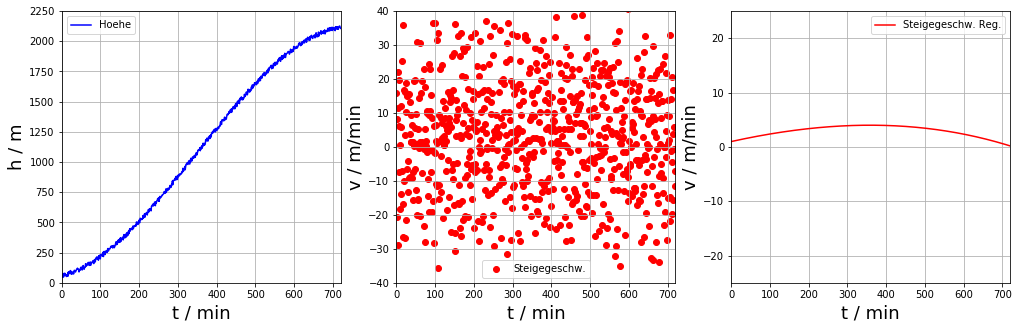

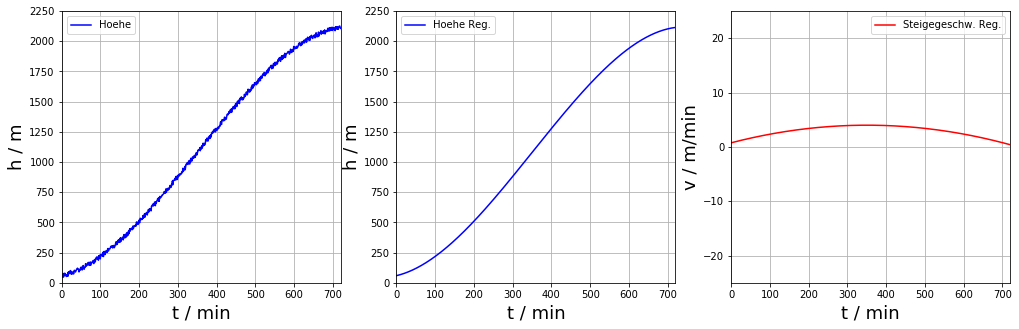

In [28]:
import numpy as np
import matplotlib.pyplot as plt

######################
### Aufgabenteil A ###
######################

# Laden und Umspeichern der Dateien
data = np.loadtxt('messdaten_ballonfahrt.txt', delimiter=';', skiprows=4)
t = data[:, 0]
h = data[:, 1]

# Array der Veraenderung der Hoehe
v = (h[1:]-h[:-1])/(t[1]-t[0])
t_v = t[:-1]

# Fit der Aenderung der Hoehe
v_P = np.polyfit(t_v, v, 3)
t_v_reg = np.linspace(np.min(t_v), np.max(t_v), 1000)
v_reg = np.polyval(v_P, t_v_reg)

# Plots
plt.figure(figsize=[17, 5])

plt.subplot(1, 3, 1)
plt.plot(t, h, 'b-', label='Hoehe')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([0, 2250])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('h / m', fontsize=18)

plt.subplot(1, 3, 2)
plt.scatter(t_v, v, c='r', label='Steigegeschw.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([-40, 40])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('v / m/min', fontsize=18)

plt.subplot(1, 3, 3)
plt.plot(t_v_reg, v_reg, 'r-', label='Steigegeschw. Reg.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([-25, 25])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('v / m/min', fontsize=18)


######################
### Aufgabenteil B ###
######################

# Erstellen und Auswerten des Polynomfits über die Hoehendaten
h_P = np.polyfit(t, h, 3)
t_reg = np.linspace(np.min(t), np.max(t), 1000)
h_reg = np.polyval(h_P, t_reg)

# Ableiten des Fits
dh_P = np.polyder(h_P)
dh_reg = np.polyval(dh_P, t_reg)

# Erstellung der Plots
plt.figure(figsize=[17,5])

plt.subplot(1, 3, 1)
plt.plot(t, h, 'b-', label='Hoehe')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([0, 2250])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('h / m', fontsize=18)

plt.subplot(1, 3, 2)
plt.plot(t_reg, h_reg, 'b-', label='Hoehe Reg.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([0, 2250])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('h / m', fontsize=18)

plt.subplot(1, 3, 3)
plt.plot(t_reg, dh_reg, 'r-', label='Steigegeschw. Reg.')
plt.grid()
plt.legend(loc=0)
plt.xlim([0, 720])
plt.ylim([-25, 25])
plt.xlabel('t / min', fontsize=18)
plt.ylabel('v / m/min', fontsize=18)
plt.show()